In [1]:
import numpy as np
import matplotlib.pyplot as plt

aj =  [3.  3.7 3.9 4.2 5.7 6.6 7.1 6.7 4.5 7.  6.1 5.6 5.8 5.2 4.1 4.3 4.1 3. ]
bj =  [ 7.85723696e-01  5.28552608e-01 -8.55919528e-02  1.01872767e+00
  1.41068127e+00  5.38547262e-01  9.73538956e-02 -5.69590371e-01
  3.44949870e-01  4.82368232e-01 -6.74422797e-01 -1.62328619e-01
  4.23737272e-01 -1.91776640e+00  3.75511669e-04  8.00418831e-01
 -8.71548237e-01  0.00000000e+00]
cj =  [ 0.         -0.25717109  0.05245623  1.05186339 -0.6599098  -0.21222421
 -0.00837247 -0.21394228  0.44257734 -0.39677122  0.01117421  0.50091997
  0.08514593 -1.25589776  3.99610049 -1.32928942 -0.34267764  0.        ]
dj =  [-0.0857237   0.03440304  0.33313572 -0.57059106  0.14922853  0.03397529
 -0.02284109  0.05470997 -0.09326095  0.04532727  0.16324858 -0.13859135
 -0.22350728  2.50095155 -5.9170999   0.32887059  0.11422588  0.        ]
100
100


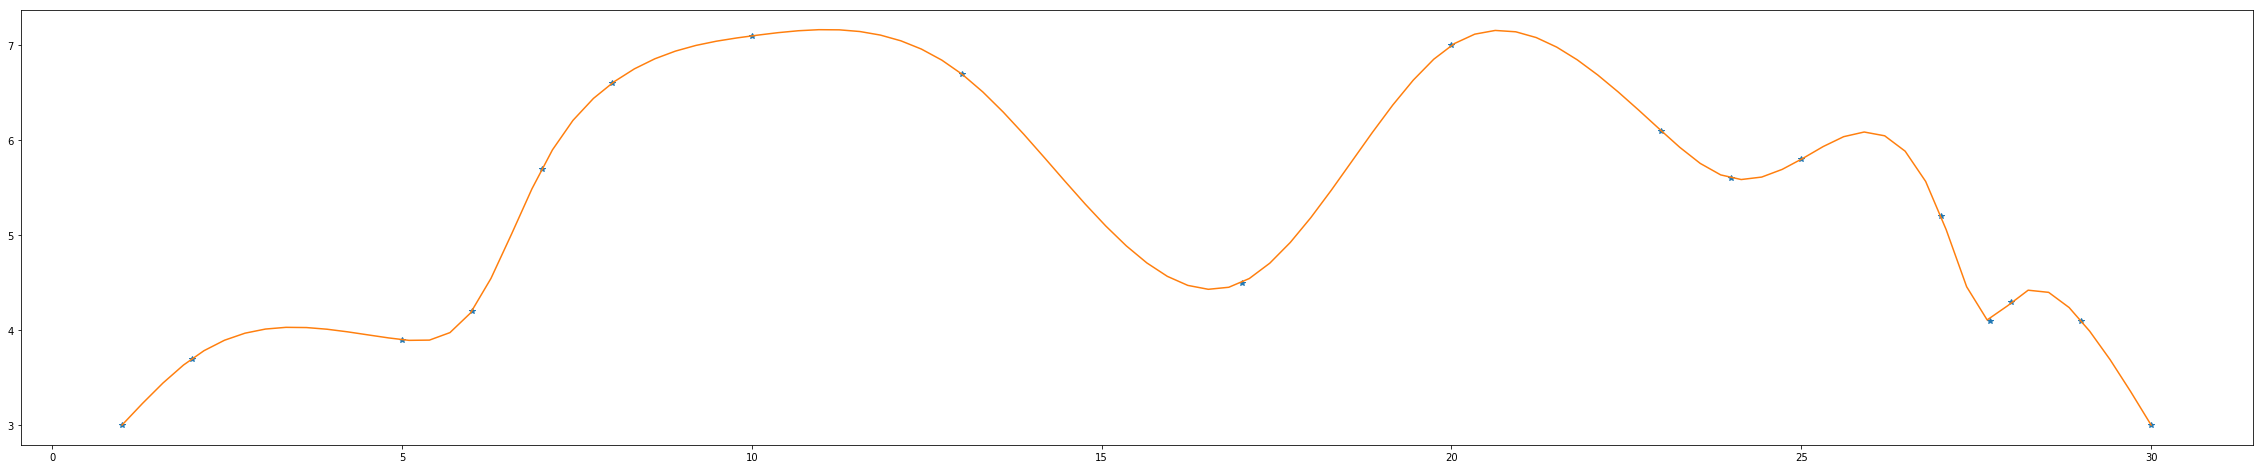

In [11]:
#x_list = [0,1,2,3]
#y_list = [1,np.e,np.e**2,np.e**3]
n = len(x_list)-1 #3/h[] n=3
x_list = [1,2,5,6,7,8,10,13,17,20,23,24,25,27,27.7,28,29,30]
y_list = [3,3.7,3.9,4.2,5.7,6.6,7.1,6.7,4.5,7,6.1,5.6,5.8,5.2,4.1,4.3,4.1,3]
n = len(x_list)-1 #3/h[] n=3

x = np.zeros(n+1)

a = np.zeros(n+1)
b = np.zeros(n+1)
c = np.zeros(n+1)
d = np.zeros(n+1)

l  = np.zeros(n+1)
mu = np.zeros(n+1)
z  = np.zeros(n+1)

va = np.zeros(n+1)

h = np.zeros(n)


for i in range(0,len(x)):
    x[i] = x_list[i]
    a[i] = y_list[i]

#step 1

for i in range(0,n):
    h[i]=x[i+1]-x[i]


#step 2

for i in range(1,n):
    va[i] = 3/h[i] * (a[i+1]-a[i]) - 3/h[i-1] * (a[i]-a[i-1])
    
#step 3, solucion del sistema de ecuaciones lineales


l[0] = 1
mu[0] = 0
z[0] = 0

for i in range(1,n):
    l[i] = 2*(x[i+1]-x[i-1]) - h[i-1]*mu[i-1]
    mu[i] = h[i]/l[i]
    z[i] = (va[i]-h[i-1]*z[i-1])/l[i]
        
l[n] = 1
z[n] = 0
c[n] = 0

for j in np.arange(n-1,-1,-1):
    c[j] = z[j]-mu[j]*c[j+1]
    b[j] = (a[j+1]-a[j])/h[j] - h[j]*(c[j+1]+2*c[j])/3
    d[j] = (c[j+1]-c[j])/(3*h[j])
    

print("aj = ",a)
print("bj = ",b)
print("cj = ",c)
print("dj = ",d)
    
x_array = np.linspace(min(x_list),max(x_list),100)
y_real = np.e**(x_array)

y_array = []



for i in range(0,len(x_array)):
    for j in range(0,n):
        if x[j]<=x_array[i]<x[j+1]:
            s = a[j]+b[j]*(x_array[i]-x[j]) + c[j]*(x_array[i]-x[j])**2 + d[j]*(x_array[i]-x[j])**3
            y_array.append(s)
    if x_array[i]==x[n]:
        s = a[n]+b[n]*(x_array[i]-x[n]) + c[n]*(x_array[i]-x[n])**2 + d[n]*(x_array[i]-x[n])**3
        y_array.append(s)

print(len(y_array))
print(len(x_array))
fig=plt.figure(figsize=(40,8))
ax=plt.axes()
ax.plot(x_list,y_list,'*')
ax.plot(x_array,y_array,'-')

#ax.plot(x_array,y_real,'--')